# Importowanie ramki danych

In [39]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np


In [40]:
data = pd.read_csv("clustering.csv", header = None)
data = data.values

# Metoda 1 - KMeans

In [41]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action="ignore")


In [42]:
def kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
    plt.title('K-means clusters')
    plt.show()

### Metoda Calinskiego Harabasza

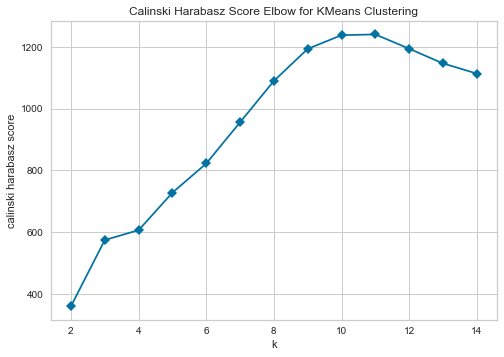

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [36]:
model = KMeans()
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(
    model, k=(2,15), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(data)       
visualizer.show()

### Metoda silhouette

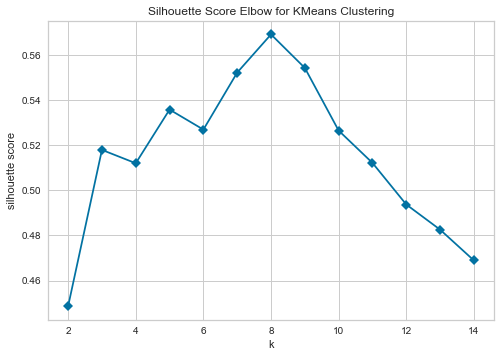

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
visualizer = KElbowVisualizer(
    model, k=(2,15), metric='silhouette', timings=False, locate_elbow=False
)

visualizer.fit(data)       
visualizer.show()

Możemy zauważyć, że w przypadku obu metryk optymalna liczba klastrów się nieco różni. W przypadku metryki Calinskiego Harabasza jest to 11, gdyż dla tej wartości metryka ta osiąga wartość maksymalną,  a w przypadku metody silhouette 8.

### Wizualizacja dla 11 klastrów

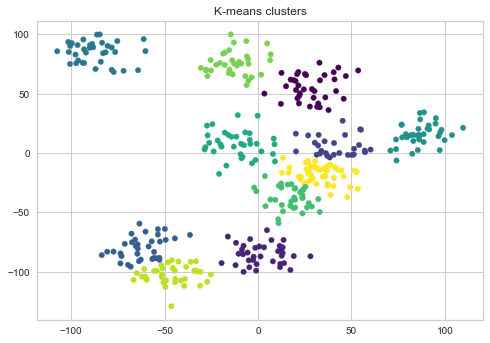

In [43]:
kmeans(data, 11)

### Wizualizacja dla 8 klastrów

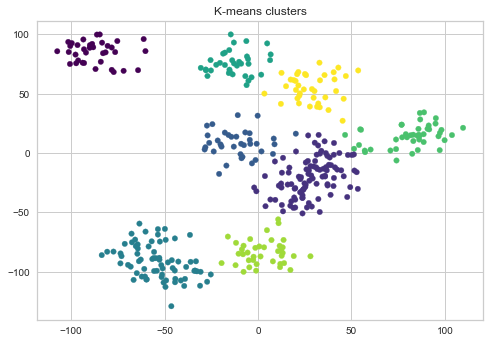

In [44]:
kmeans(data, 8)

# Metoda 2 - aglomeracyjna

In [49]:
from sklearn.cluster import AgglomerativeClustering


### Metoda Calinskiego Harabasza

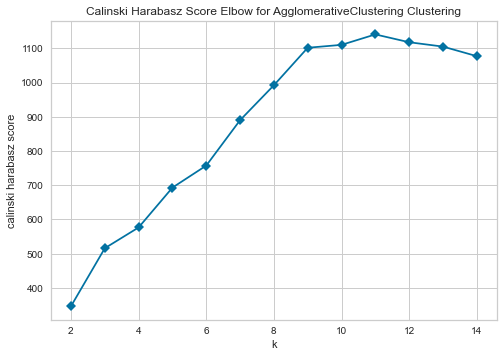

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [34]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    model, k=(2,15), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(data)       
visualizer.show()

### Metoda silhouette

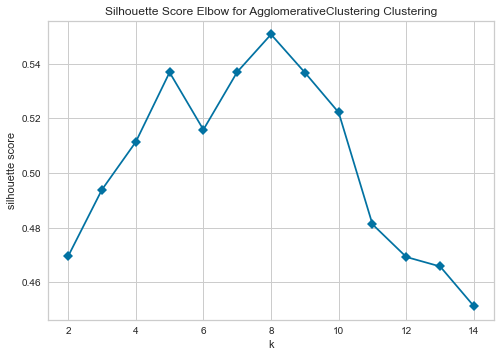

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
visualizer = KElbowVisualizer(
    model, k=(2,15), metric='silhouette', timings=False, locate_elbow=False
)

visualizer.fit(data)       
visualizer.show()

W przypadku metody aglomeracyjnej możemy zauważyć, że wyniki optymalnej liczby klastrów są podobne jak w przypadku metody KMeans

### Wizualizacja dla 8 klastrów

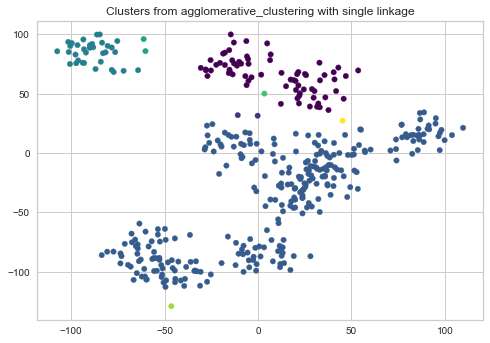

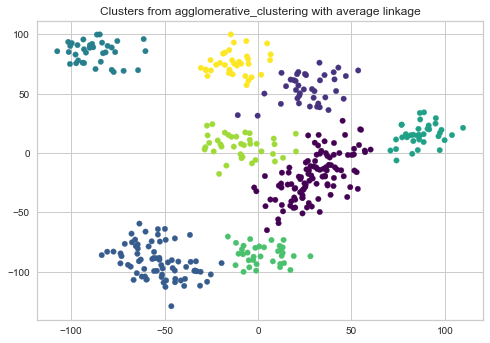

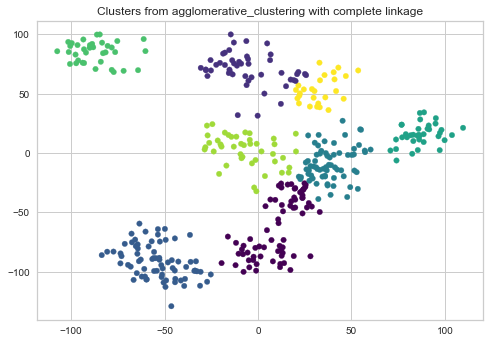

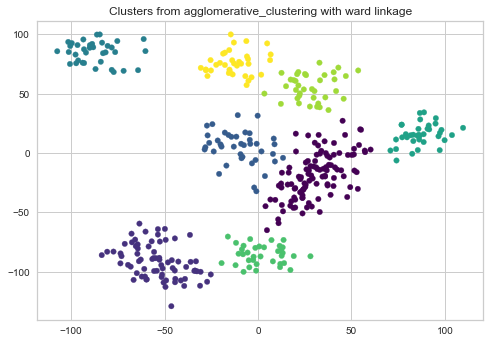

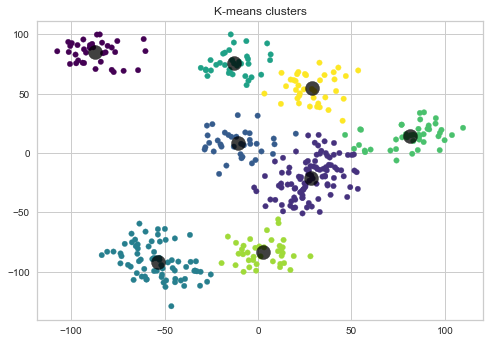

In [58]:
def plot_agglomerative_clustering(X, n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=8, linkage=linkage)
    y = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plt.title(f'Clusters from agglomerative_clustering with {linkage} linkage')
    plt.show()

for linkage in {'ward', 'complete', 'average', 'single'}:
    plot_agglomerative_clustering(data, n_clusters=8, linkage=linkage)
    
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('K-means clusters')
plt.show()    


### Wizualizacja dla 11 klastrów

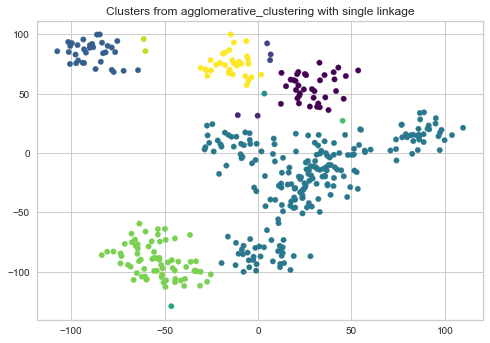

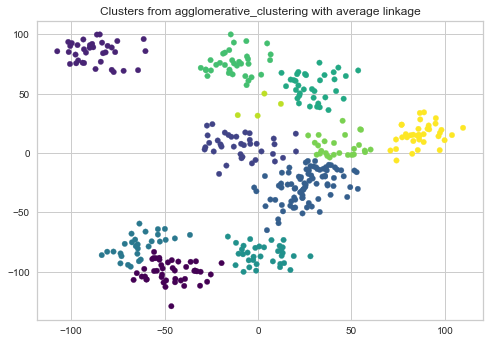

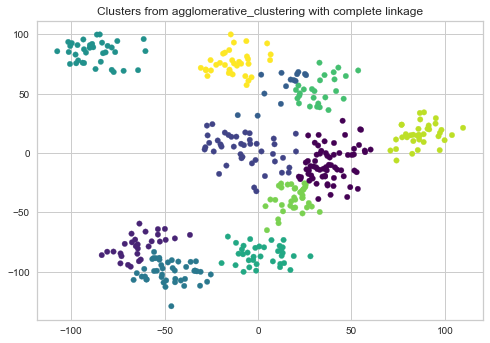

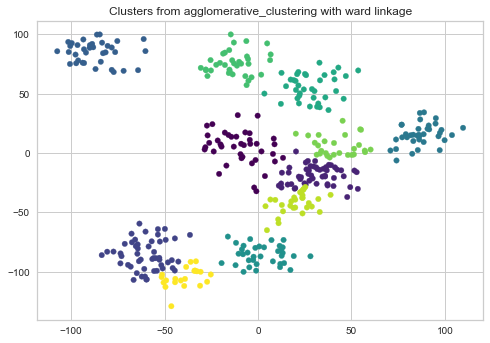

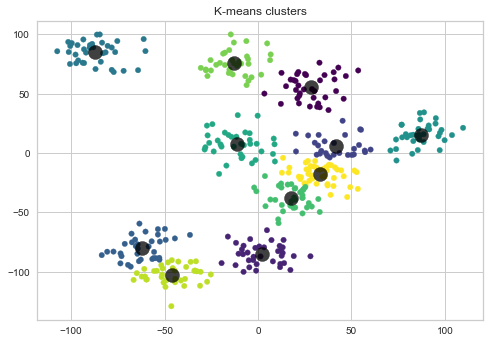

In [57]:
def plot_agglomerative_clustering(X, n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=11, linkage=linkage)
    y = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plt.title(f'Clusters from agglomerative_clustering with {linkage} linkage')
    plt.show()

for linkage in {'ward', 'complete', 'average', 'single'}:
    plot_agglomerative_clustering(data, n_clusters=8, linkage=linkage)
    
kmeans = KMeans(n_clusters=11, random_state=0)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('K-means clusters')
plt.show()    
